# ML for AIR

In [1]:
import pandas as pd
import numpy as np
import string as str
from datetime import datetime
import sys
import statsmodels.api as sm
import pmdarima as pm
import matplotlib.pyplot as plt
from autots import AutoTS
#from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
path = r"D:\OneDrive - Wipro\Desktop\AIR\\"
infile =  path + "AIR_WDC_today_Q325.csv"

#table = pd.read_csv(infile, engine='python',sep=',', quotechar='"', error_bad_lines=False)

table_chunk = pd.read_csv(infile, engine='python', sep=',', chunksize=2000000)
table = pd.concat(list(table_chunk))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

table.head()

,LOAD_DATE,SR_GUID,PROJECT_NUMBER,PROJECT_NAME,PROJECT_DESCRIPTION,CUSTOMER_NO,CUSTOMER_NAME,INDENT_STATUS,PROJECT_PROFIT_CENTER,PROJECT_PROFIT_CENTER_DESCRIPTION,...,SL_OPS_PC_CODE,SL_OPS_GBL,SL_OPS_SERVICE_LINE,SLWBS,SL_DM_ID,SL_DM_NAME,SL_PM_ID,SL_PM_NAME,SOW_OWNER_EMAIL,REPORT_TIME
0,2025-02-21,0DB01716A8EF1EDFA08132AD9644FEF8,605170,73063/P03/B99/S61,73063/P03/B99SO00000035-PR2024K0936561,2.252900e+04,HSBC Software Delvelopment India Pv,RECRUIT,PC34100,EUROPE,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,73063/P03/B99/SL01,131690.0,Pravin Ranglalji Mantri,20388183.0,Smita Sarwate,pravin.mantri@wipro.com,21-FEB-2025 01:14:29
1,2025-02-21,0DB01716A8EF1EDFA0C88DE701443F80,55674,INS-NOR-PJ-RPA_DEV,INS-NWM-PJ- RPA DEV,2.024000e+03,Northwestern Mutual,RECRUIT,PC32900,AMERICAS 2,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,127604_USD/SL04,165191.0,Vijay Anand Viswanathan,300109.0,Kasirajesh Venkitakrishnan,vijay.vishwanathan@wipro.com,21-FEB-2025 01:14:29
2,2025-02-21,0DB01716A8EF1EDFA0B07C527A5D5F62,607431,73502/P03/B99/S56-1,73502/P03/B99SO00000158-PR2024K09391156,6.427000e+03,"Ross Dress For Less, Inc.",INTERNAL,PC30300,AMERICAS 1,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,73502/P03/B99/SL01,98788.0,Shyam Prasad Vidyala Naga,262221.0,Ashwin Kumar S,vidyala.shyam@wipro.com,21-FEB-2025 01:14:29
3,2025-02-21,0DB01716A8EF1EDFA18F6A4ADD669FB4,607092,38042/P05/B07/S35,CIT-CIT-PJ-ICG-TTS-CC-FPC,1.985700e+04,"Citigroup Technology, Inc",RECRUIT,PC32100,AMERICAS 2,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,NaN,NaN,NaN,NaN,NaN,vikas.gupta@wipro.com,21-FEB-2025 01:14:29
4,2025-02-21,0DB01716A8EF1EDFA1DD637D0B33FFE8,453943,69880/P03/B99/S80,69880/P03/B99SO00000035-PR2024K06261180,1.100041e+09,The Depository Trust Clearing,INTERNAL,PC32900,AMERICAS 2,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,NaN,NaN,NaN,NaN,NaN,ganesan.77@wipro.com,21-FEB-2025 01:14:29


In [3]:
table.describe()

,PROJECT_NUMBER,CUSTOMER_NO,TM_ID,PM_ID,NO_OF_RESOURCES,PROPOSED,ALLOCATED,OPEN_POS,IFP_EMP_NO,ROLE_ID,...,EMP_NO,P2P_R2R_IND_FL,TOTAL_MTE_OPENINGS,TOTAL_MTE_ALLOCATED,TOTAL_INTERNAL_OPENINGS,TOTAL_INTERNAL_ALLOCATED,ZMTE_APPROVED_ON,SR_BILLABILITY_PERCENTAGE,SL_DM_ID,SL_PM_ID
count,6491.000000,6.351000e+03,6.491000e+03,6.491000e+03,6491.000000,6491.000000,6491.000000,6491.000000,6.491000e+03,6491.000000,...,6.491000e+03,0.0,6491.000000,6491.000000,6491.000000,6491.000000,6.491000e+03,6491.000000,4.714000e+03,4.714000e+03
mean,474440.894777,8.669275e+07,5.874125e+06,8.221451e+06,1.243876,2.686797,0.066246,0.189339,2.224068e+06,606.442151,...,1.369670e+06,NaN,0.658604,0.058389,0.585272,0.007857,9.820118e+06,99.837467,6.206491e+06,8.677394e+06
std,158383.343723,2.962520e+08,8.987282e+06,9.686178e+06,0.978265,6.597523,0.266089,0.740872,5.900468e+06,666.293481,...,5.693127e+06,NaN,0.795932,0.251611,0.955041,0.091722,1.011736e+07,2.946715,9.139299e+06,9.993473e+06
min,41103.000000,6.700000e+01,0.000000e+00,6.706600e+04,1.000000,0.000000,0.000000,-2.000000,1.001900e+05,19.000000,...,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,1.438200e+04,6.706600e+04
25%,381870.000000,7.589000e+03,1.354690e+05,3.084120e+05,1.000000,0.000000,0.000000,0.000000,1.001900e+05,115.000000,...,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,100.000000,1.400360e+05,3.557830e+05
50%,455204.000000,1.683400e+04,2.747220e+05,8.109180e+05,1.000000,1.000000,0.000000,0.000000,1.970180e+05,159.000000,...,0.000000e+00,NaN,1.000000,0.000000,0.000000,0.000000,0.000000e+00,100.000000,2.787750e+05,7.879295e+05
75%,612592.000000,7.034800e+04,2.010090e+07,2.014829e+07,1.000000,3.000000,0.000000,0.000000,5.500510e+05,1444.000000,...,0.000000e+00,NaN,1.000000,0.000000,1.000000,0.000000,2.024112e+07,100.000000,2.014708e+07,2.021049e+07
max,638367.000000,1.100045e+09,2.055201e+07,4.008458e+07,20.000000,140.000000,4.000000,15.000000,2.052723e+07,4391.000000,...,4.017224e+07,NaN,15.000000,4.000000,19.000000,2.000000,2.025022e+07,100.000000,2.055201e+07,4.013274e+07


In [4]:
df = table[['INDENT_CREATED_ON','ESSENTIAL_SKILL','NO_OF_RESOURCES','INDENT_STATE']]

In [5]:
df.head()

,INDENT_CREATED_ON,ESSENTIAL_SKILL,NO_OF_RESOURCES,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
1,2024-10-04,Fullstack DevOps,1,FULFILLED
2,2024-10-03,Architecting,1,CANCELLED
3,2024-10-07,Fullstack DevOps,1,CANCELLED
4,2024-10-10,Fullstack Java Enterprise,6,CANCELLED


In [6]:
df.describe()

,NO_OF_RESOURCES
count,6491.000000
mean,1.243876
std,0.978265
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,20.000000


In [7]:
df.rename(columns={'INDENT_CREATED_ON': 'Date'}, inplace=True)
df.rename(columns={'NO_OF_RESOURCES': 'Total'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491 entries, 0 to 6490
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             6491 non-null   object
 1   ESSENTIAL_SKILL  6491 non-null   object
 2   Total            6491 non-null   int64 
 3   INDENT_STATE     6491 non-null   object
dtypes: int64(1), object(3)
memory usage: 203.0+ KB


In [8]:
df.head()

,Date,ESSENTIAL_SKILL,Total,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
1,2024-10-04,Fullstack DevOps,1,FULFILLED
2,2024-10-03,Architecting,1,CANCELLED
3,2024-10-07,Fullstack DevOps,1,CANCELLED
4,2024-10-10,Fullstack Java Enterprise,6,CANCELLED


In [9]:
df['Date'] = pd.to_datetime(df.Date)
#df.head()
#meandf = df['Total'].mean(skipna=True)
#df=df.replace(0,meandf) 
#df['Total'] = df['Total'].replace(['0'],np.average(df['Total']))
df.head()

,Date,ESSENTIAL_SKILL,Total,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
1,2024-10-04,Fullstack DevOps,1,FULFILLED
2,2024-10-03,Architecting,1,CANCELLED
3,2024-10-07,Fullstack DevOps,1,CANCELLED
4,2024-10-10,Fullstack Java Enterprise,6,CANCELLED


In [10]:
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['2024-10-01', '2024-10-04', '2024-10-03', '2024-10-07',
               '2024-10-10', '2024-10-04', '2024-10-03', '2024-10-07',
               '2024-10-11', '2024-10-03',
               ...
               '2024-12-12', '2024-12-12', '2024-12-13', '2024-12-13',
               '2024-12-13', '2024-12-19', '2024-12-19', '2024-12-20',
               '2024-12-21', '2024-12-22'],
              dtype='datetime64[ns]', name='Date', length=6491, freq=None)

In [ ]:
df.asfreq('d').index # Setting the freq of series to Daily 'd'

In [11]:
df = df.groupby("Date").sum()

In [12]:
df = df.sort_index()
df = df['2024-10-01':'2024-12-31'].resample('D').sum()
df.head()

,ESSENTIAL_SKILL,Total,INDENT_STATE
Date,,,
2024-10-01,Fullstack Java Enterprise.NETCore JavaIBM Data...,95,CANCELLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDC...
2024-10-02,TestingFunctional TestingArchitectingTestingFu...,25,CANCELLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDC...
2024-10-03,ArchitectingDevOpsJava-J2EEPython Application ...,207,CANCELLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDC...
2024-10-04,Fullstack DevOpsApp Cloud Development Services...,87,FULFILLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDC...
2024-10-05,MicroservicesMainframeFullstack Java Enterpris...,9,CANCELLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDF...


In [13]:
tdf = df['Total']# copy of Dataframe
tdf1 = tdf.rolling(window=7).mean()
tdf1 = tdf1.fillna(method='bfill')

In [14]:
tdf.to_csv("test.csv")

In [15]:
tdf.rolling(window=7).mean()
tdf.dropna()
tdf

Date
2024-10-01     95
2024-10-02     25
2024-10-03    207
2024-10-04     87
2024-10-05      9
             ... 
2024-12-27     20
2024-12-28      0
2024-12-29      1
2024-12-30     15
2024-12-31      7
Freq: D, Name: Total, Length: 92, dtype: int64

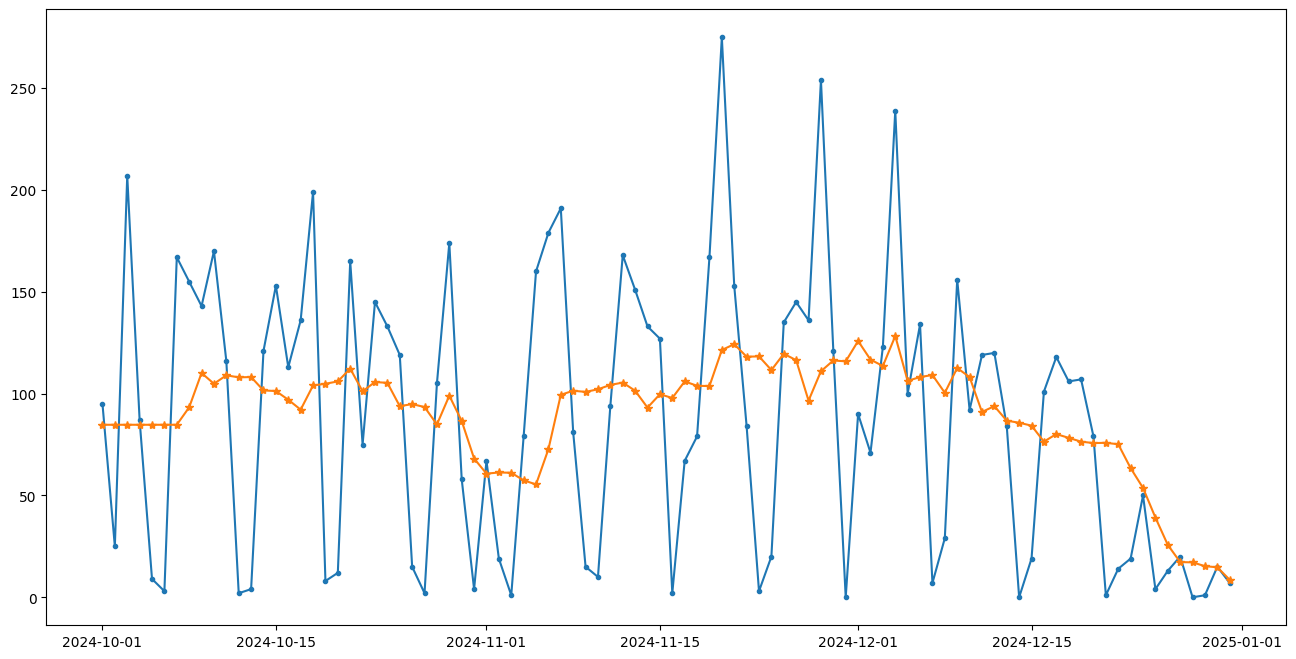

In [16]:
plt.figure(figsize=(16,8))
plt.plot(tdf, label='Open Position Trend', marker='.')
plt.plot(tdf1, marker='*')

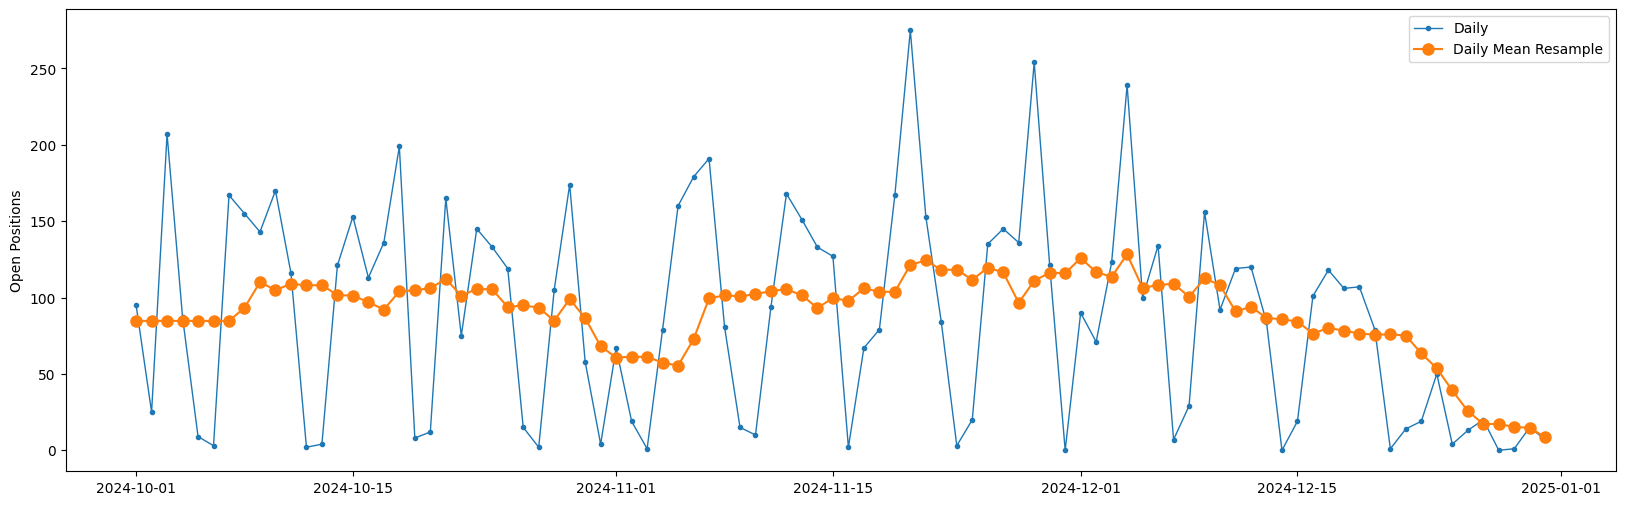

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(tdf,marker='.', linestyle='-', linewidth=1, label='Daily')
ax.plot(tdf1.resample('D').mean(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Open Positions')
ax.legend()

In [18]:
model = AutoTS(
    forecast_length=30,
    frequency='D',
    prediction_interval=0.95,
    ensemble=None, # type: ignore
    models_mode='deep',
    model_list = ['ARIMA'],
    max_generations=10,
    num_validations=3,
    no_negatives=True,
    n_jobs='auto') # type: ignore

Using 10 cpus for n_jobs.


In [19]:
model.fit(tdf1) #type: ignore
prediction = model.predict(forecast_length=30) #type: ignore

Data frequency is: D, used frequency is: D
Too many training validations for length of data provided, decreasing num_validations to 1
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params akima {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'cutoff': 365, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '3': {'rows': 1, 'lag': 84, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}} with error IndexError('single positional indexer is out-of-bounds')") in model 2 in generation 0: 

In [20]:
model.export_template(
    "model2.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
) # type: ignore

In [21]:
#declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(tdf) # type: ignore
prediction = model.predict(forecast_length=10) # type: ignore

Data frequency is: D, used frequency is: D
Model Number: 65 with model ARIMA in generation 0 of 10
Model Number: 66 with model ARIMA in generation 0 of 10
Model Number: 67 with model ARIMA in generation 0 of 10
New Generation: 1 of 10
Model Number: 68 with model ARIMA in generation 1 of 10
Model Number: 69 with model ARIMA in generation 1 of 10
Model Number: 70 with model ARIMA in generation 1 of 10
Model Number: 71 with model ARIMA in generation 1 of 10
Model Number: 72 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 72 in generation 1: ARIMA
New Generation: 2 of 10
Model Number: 73 with model ARIMA in generation 2 of 10
Model Number: 74 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 74 in generation 2: ARIMA
Model Number: 75 with model ARIMA in generation 2 of 10
Model Number: 76 with model ARIMA in ge

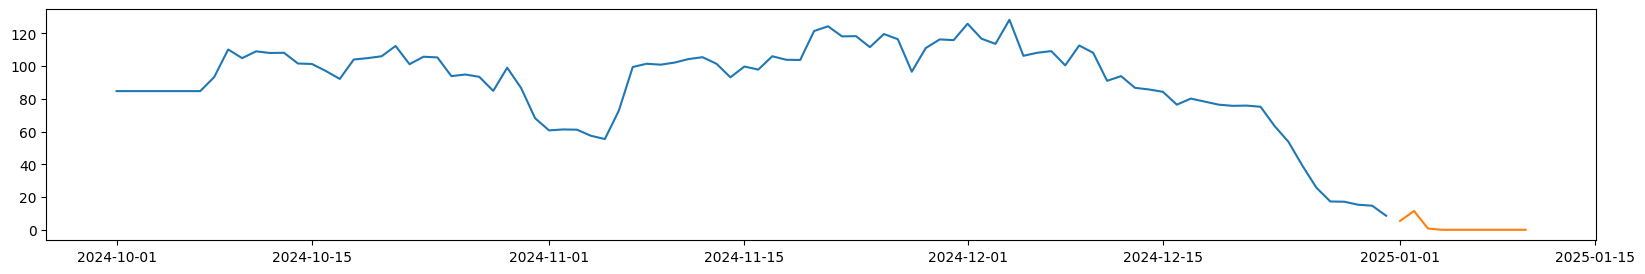

In [22]:
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(tdf1)
ax.plot(prediction.forecast) # type: ignore

In [23]:
# Fit auto_arima model
auto_model = pm.auto_arima(tdf1, 
                           seasonal=True, m=4, 
                           trace=True, error_action='ignore', 
                           suppress_warnings=True,
                           scoring='mse',
                        #    start_p=0,start_q=0,
                        #    max_p=5,
                        #    max_q=5,
                        #    max_P=2, 
                        #    max_Q=2,
                        #    max_order=5,
                           n_jobs=-1,
                           test='adf',
                           n_fits=50)

# Print the summary of the model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=648.982, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=649.015, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=647.925, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=649.657, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=647.919, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=647.192, Time=0.16 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=644.735, Time=0.32 sec
 ARIMA(0,1,0)(2,0,1)[4] intercept   : AIC=646.578, Time=0.79 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=646.332, Time=0.75 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=644.116, Time=0.91 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=645.992, Time=1.08 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=646.126, Time=1.00 sec
 ARIMA(2,1,0)(2,0,0)[4] intercept   : AIC=645.675, Time=1.14 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=643.427, Time=1.51 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=647.5

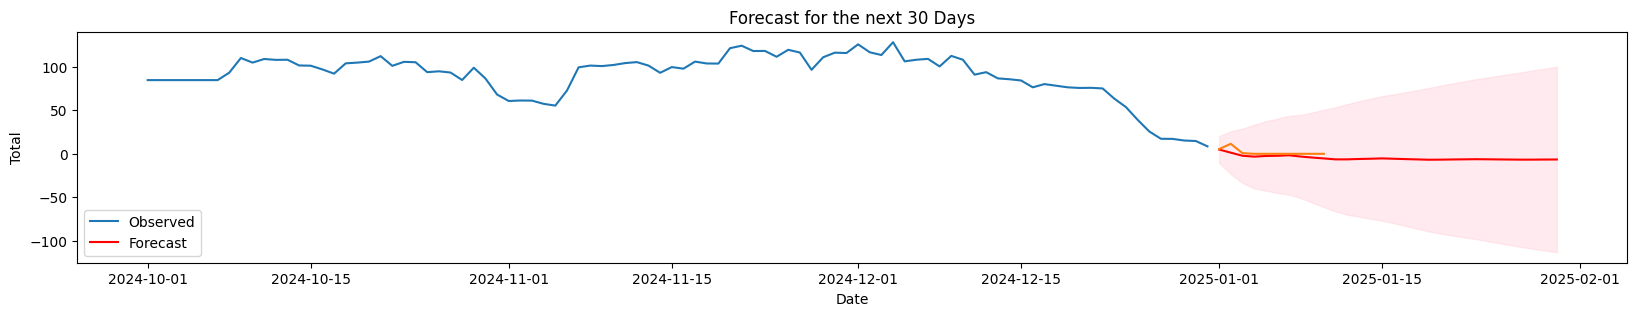

In [24]:
# Predict for the next 3 months (approximately 90 days)
n_periods = 30
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for the forecast
forecast_index = pd.date_range(start=tdf.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')

# Create a DataFrame to hold the forecast and confidence intervals
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int[:, 0],
    'Upper CI': conf_int[:, 1]
}, index=forecast_index)

forecast_df.to_csv("predict.csv")

# Plot the forecast
fig,ax = plt.subplots(figsize=(20,3))
#plt.figure(figsize=(16, 8))
plt.plot(tdf1, label='Observed')
plt.plot(forecast_df['Forecast'], label='Forecast', color='r')
ax.plot(prediction.forecast)
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecast for the next 30 Days')
plt.legend()
plt.show()

In [25]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(timeseries, period = int(len(tdf)/2), model = "additive")  
#figure = plt.figure()  
#figure = decomposition.plot()  
#figure.set_size_inches(15, 8
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model ='additive',extrapolate_trend='freq', period=4)
    fig = decomposition.plot()
    fig.set_size_inches(24,8)
    plt.show()

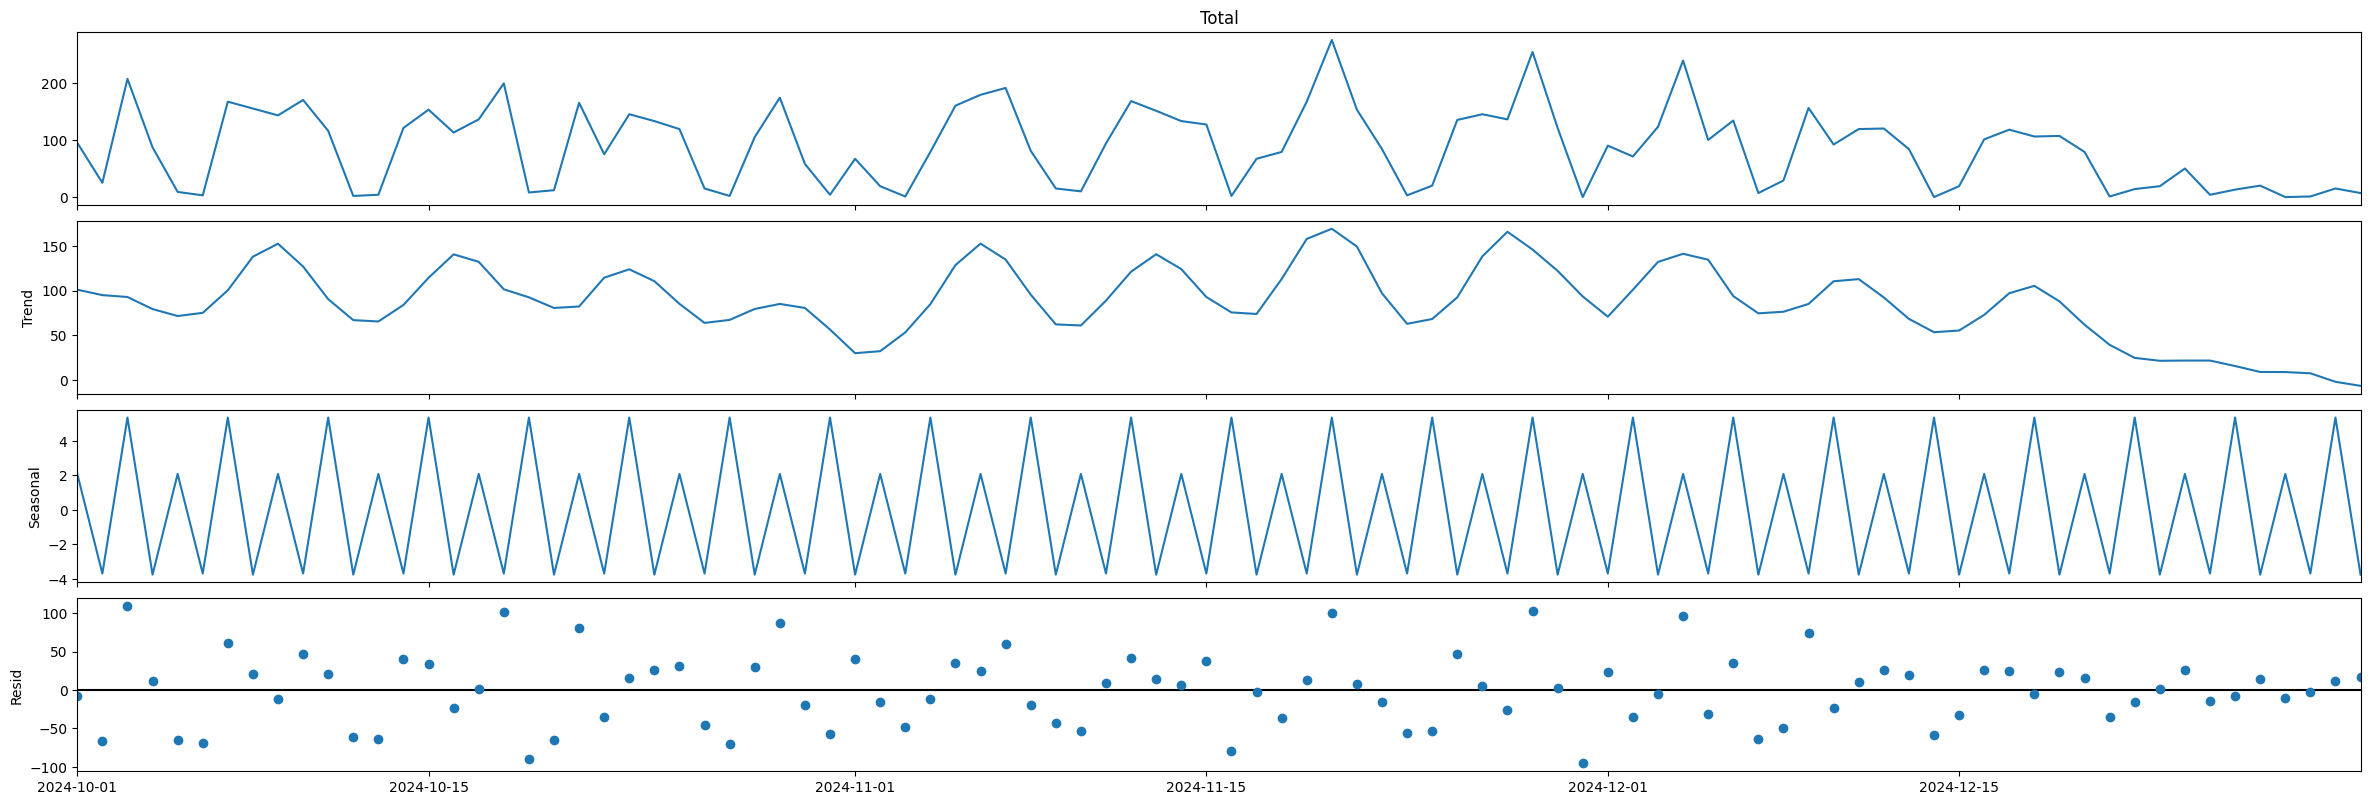

In [26]:
seasonal_decompose(tdf)

In [ ]:
#plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    timeseries.rolling(4).mean().plot(label='4 Weeks Rolling Mean')
    timeseries.rolling(8).std().plot(label='8 Weeks Rolling Std')
    timeseries.plot(title=title)
    plt.legend()

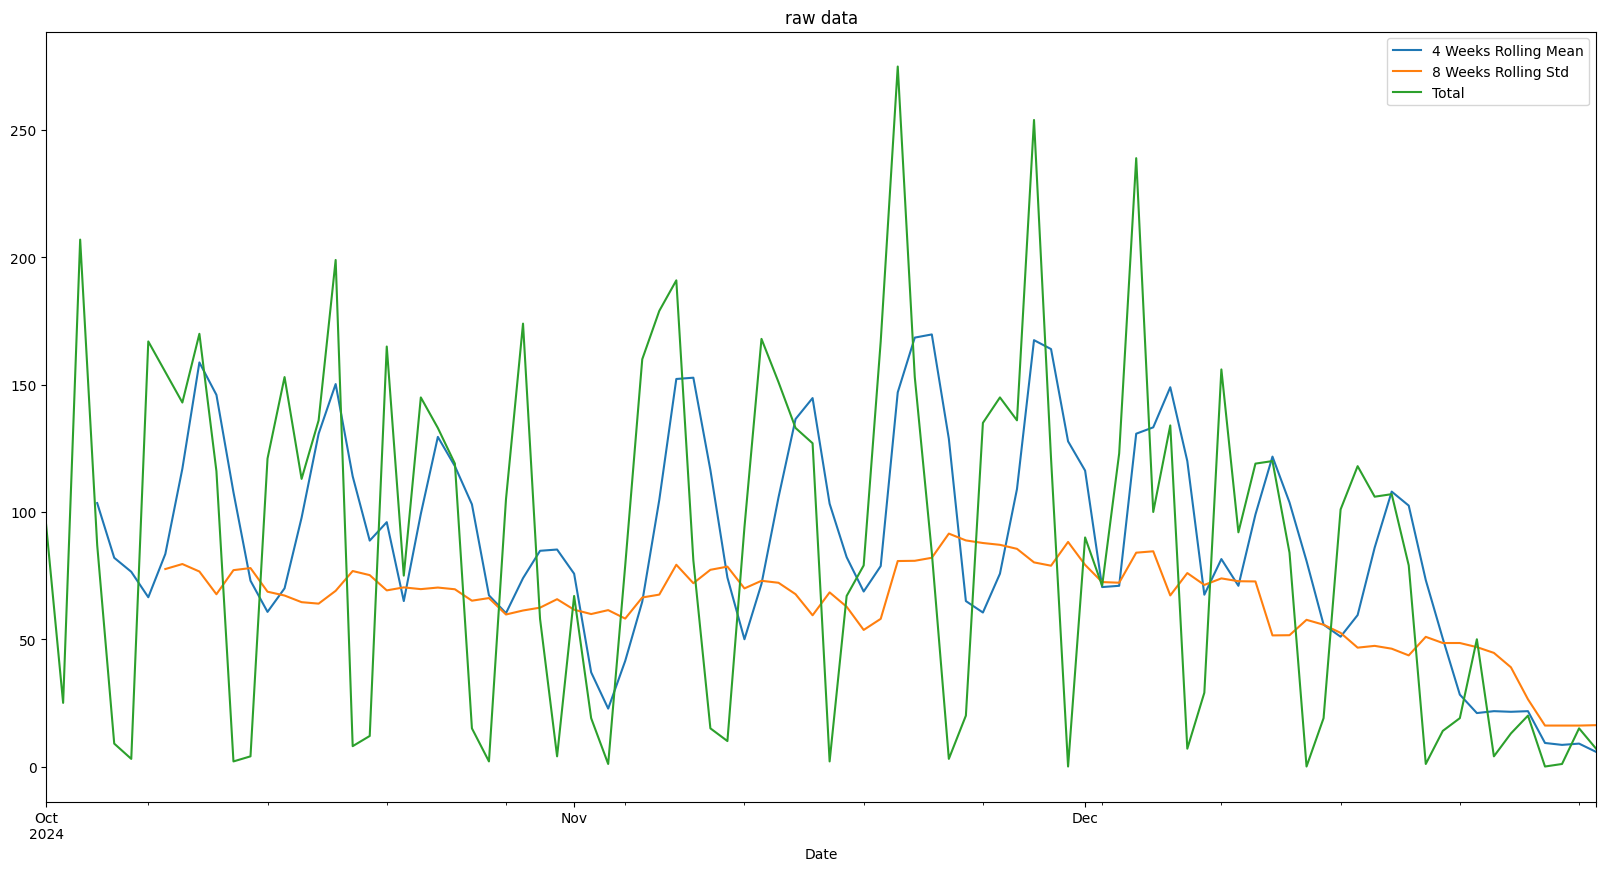

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(tdf,'raw data')

In [ ]:
from statsmodels.tsa.stattools import adfuller

"""
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(test_result,labels):
        print(label)
        print(value)
        #print (value)
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
"""
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    test_result = adfuller(timeseries.dropna(),autolag='AIC')
    print ('ADF Test:')
    print('Test statistic = {:.3f}'.format(test_result[0]))
    print('P-value = {:.3f}'.format(test_result[1]))
    print('Critical values :')
    for k, v in test_result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<test_result         [0] else '', 100-int(k[:-1])))

In [ ]:
ADF_test(tdf,'raw data')

 > Is the raw data stationary ?
ADF Test:
Test statistic = -0.191
P-value = 0.940
Critical values :
	1%: -3.5117123057187376 - The data is not stationary with 99% confidence
	5%: -2.8970475206326833 - The data is not stationary with 95% confidence
	10%: -2.5857126912469153 - The data is not stationary with 90% confidence


 > Is the de-trended data stationary ?
ADF Test:
Test statistic = -0.940
P-value = 0.775
Critical values :
	1%: -3.5232835753964475 - The data is not stationary with 99% confidence
	5%: -2.902030597326081 - The data is not stationary with 95% confidence
	10%: -2.5883710883843123 - The data is not stationary with 90% confidence


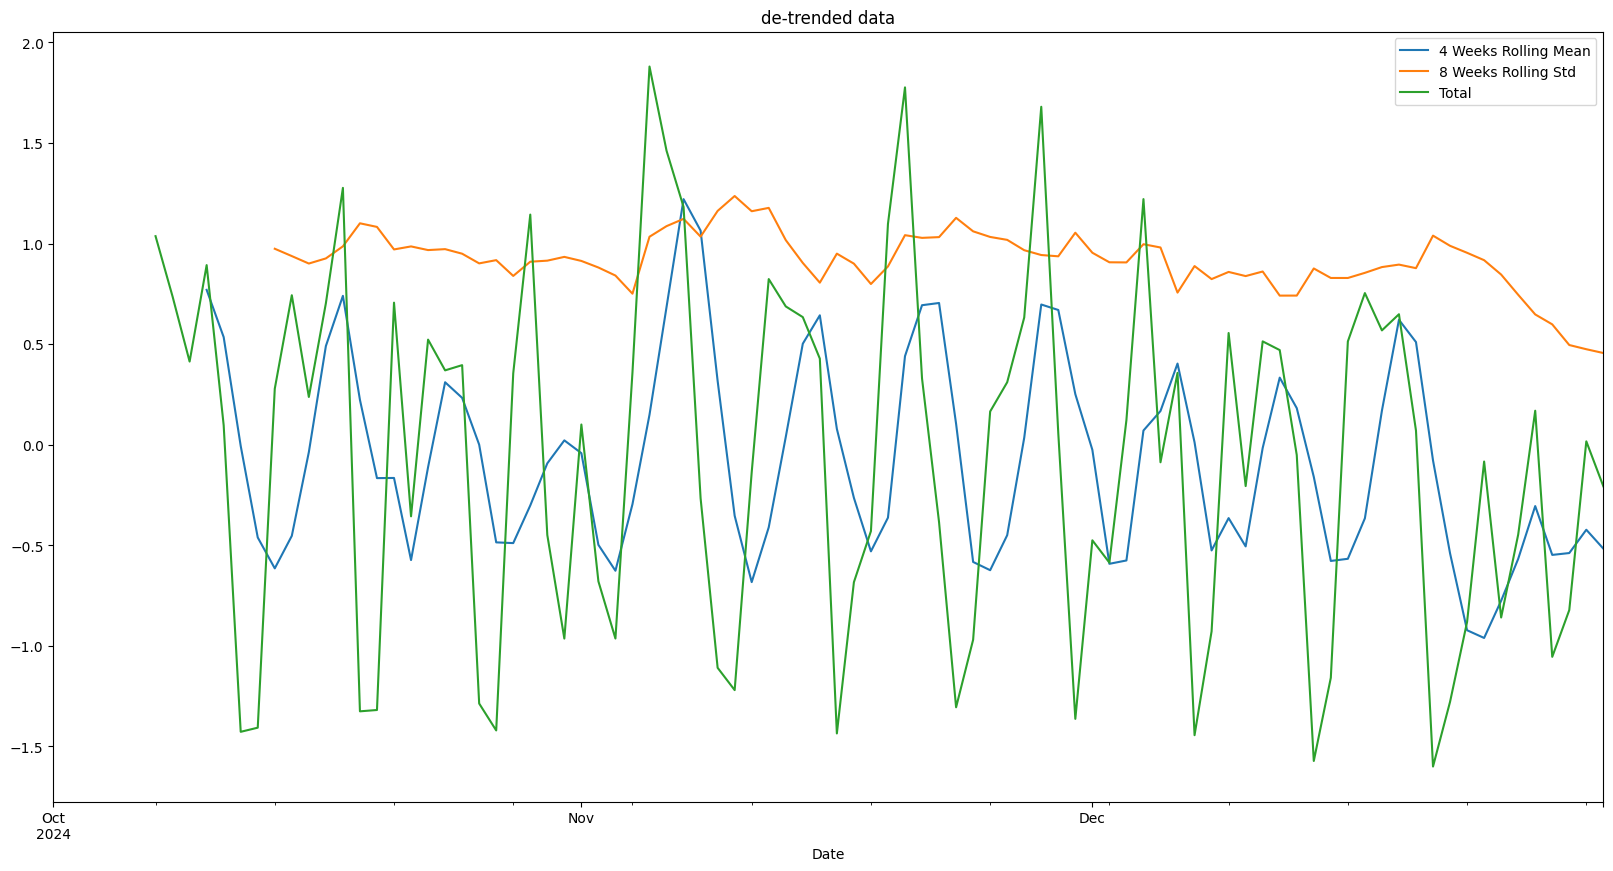

In [ ]:
# Detrending
tdf_detrend =  (tdf - tdf.rolling(window=7).mean())/tdf.rolling(window=7).std()
test_stationarity(tdf_detrend,'de-trended data')
ADF_test(tdf_detrend,'de-trended data')

 > Is the 4 lag differenced data stationary ?
ADF Test:
Test statistic = -3.969
P-value = 0.002
Critical values :
	1%: -3.517113604831504 - The data is  stationary with 99% confidence
	5%: -2.8993754262546574 - The data is  stationary with 95% confidence
	10%: -2.5869547797501644 - The data is  stationary with 90% confidence


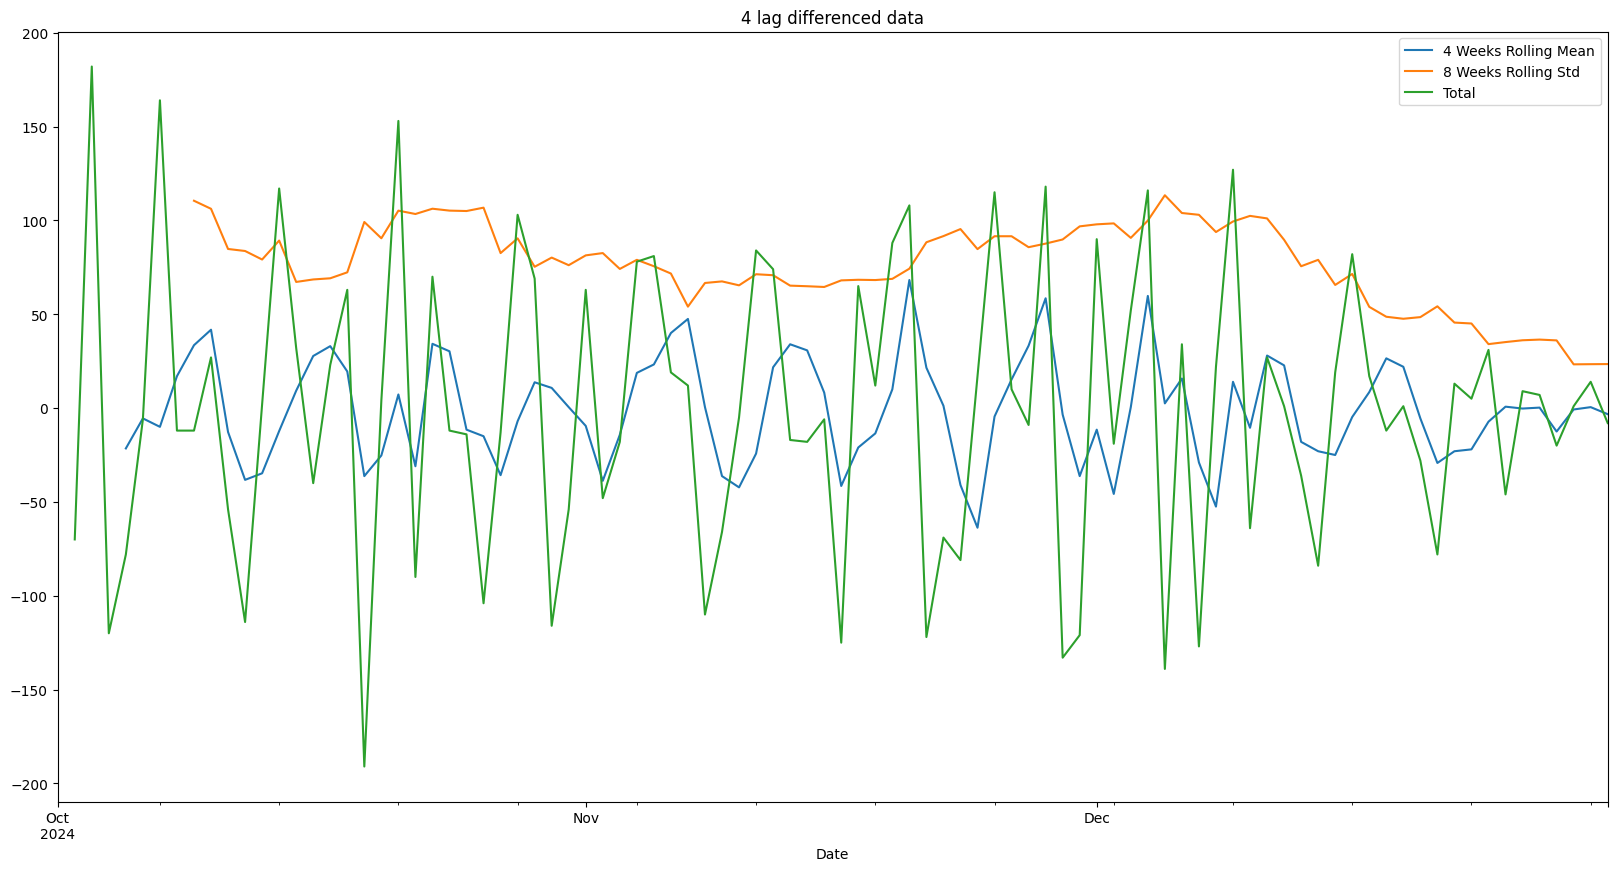

In [ ]:
# Differencing
tdf_4lag =  tdf - tdf.shift(1)

test_stationarity(tdf_4lag,'4 lag differenced data')
ADF_test(tdf_4lag,'4 lag differenced data')

 > Is the 4 lag differenced de-trended data stationary ?
ADF Test:
Test statistic = -3.487
P-value = 0.008
Critical values :
	1%: -3.526004646825607 - The data is not stationary with 99% confidence
	5%: -2.9032002348069774 - The data is  stationary with 95% confidence
	10%: -2.5889948363419957 - The data is  stationary with 90% confidence


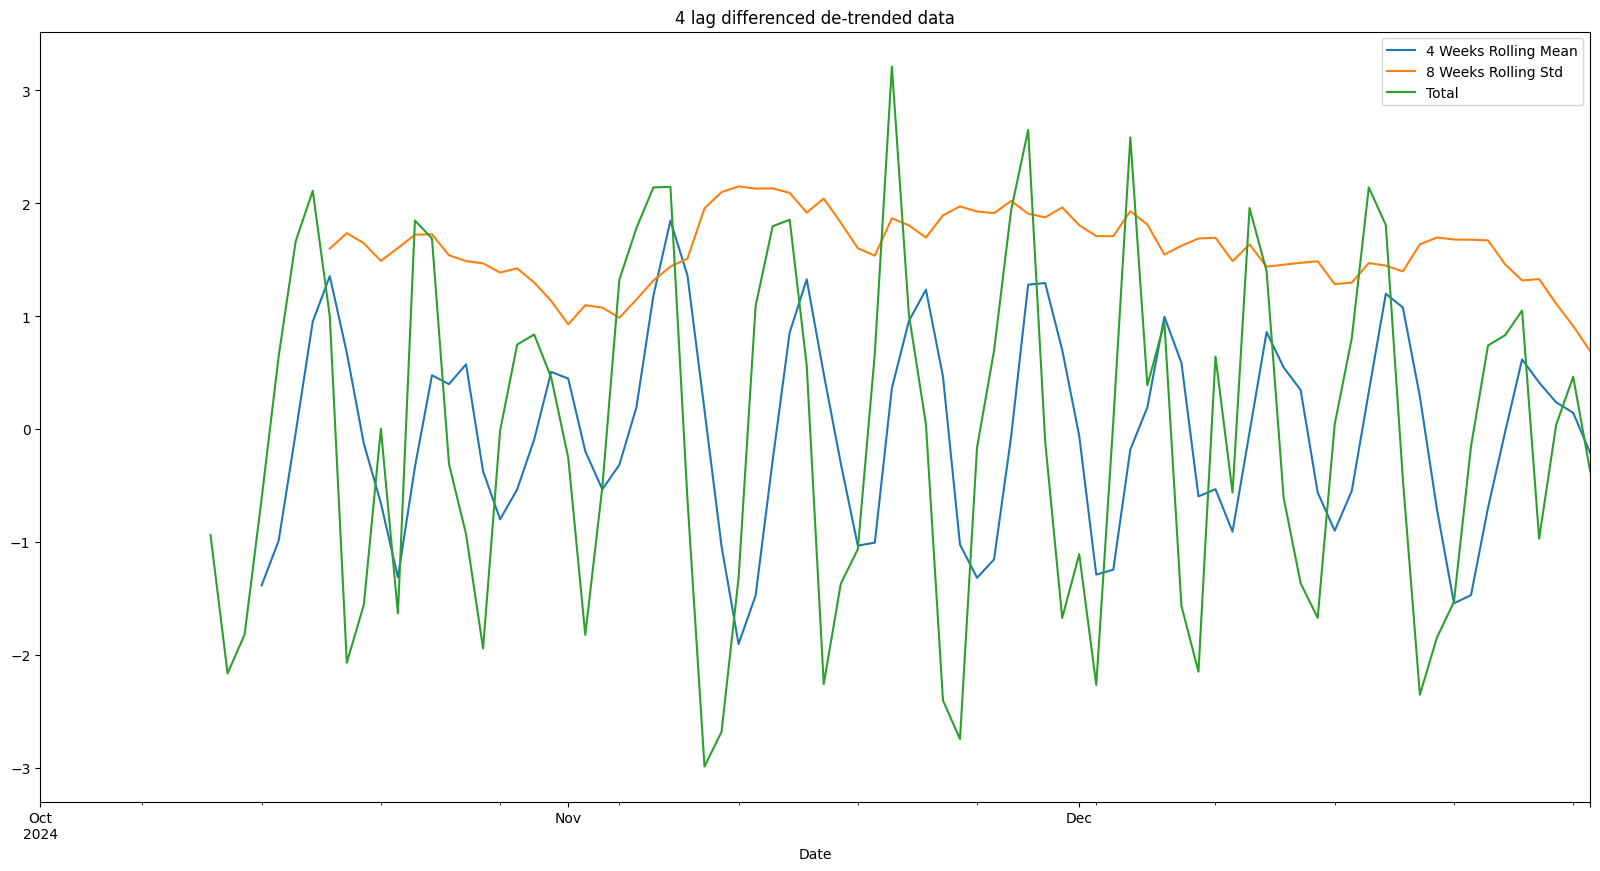

In [ ]:
# Detrending + Differencing
tdf_4lag_detrend =  tdf_detrend - tdf_detrend.shift(4)
test_stationarity(tdf_4lag_detrend,'4 lag differenced de-trended data')
ADF_test(tdf_4lag_detrend,'4 lag differenced de-trended data')

In [ ]:
y_to_train = tdf_4lag[:'2024-11-01'] # dataset to train
y_to_val = tdf_4lag['2024-11-02':] # last X months for test  
#predict_date = len(tdf_4lag) - len(tdf_4lag[:'2024-12-25']) # the number of data points for the test set
#y_to_val.head()
#y_to_train.head()

In [ ]:
import itertools

def sarima_grid_search(tdf,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(tdf,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [ ]:
sarima_grid_search(tdf_4lag,12)

The set of parameters with the minimum AIC is: SARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:761.7163678852437


In [ ]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(15, 12))
    #results.plot_diagnostics()

    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.398     -2.511      0.012      -1.781      -0.219
ma.S.L4       -0.5724      0.275     -2.084      0.037      -1.111      -0.034
sigma2      6029.9147    6.6e-05   9.13e+07      0.000    6029.915    6029.915


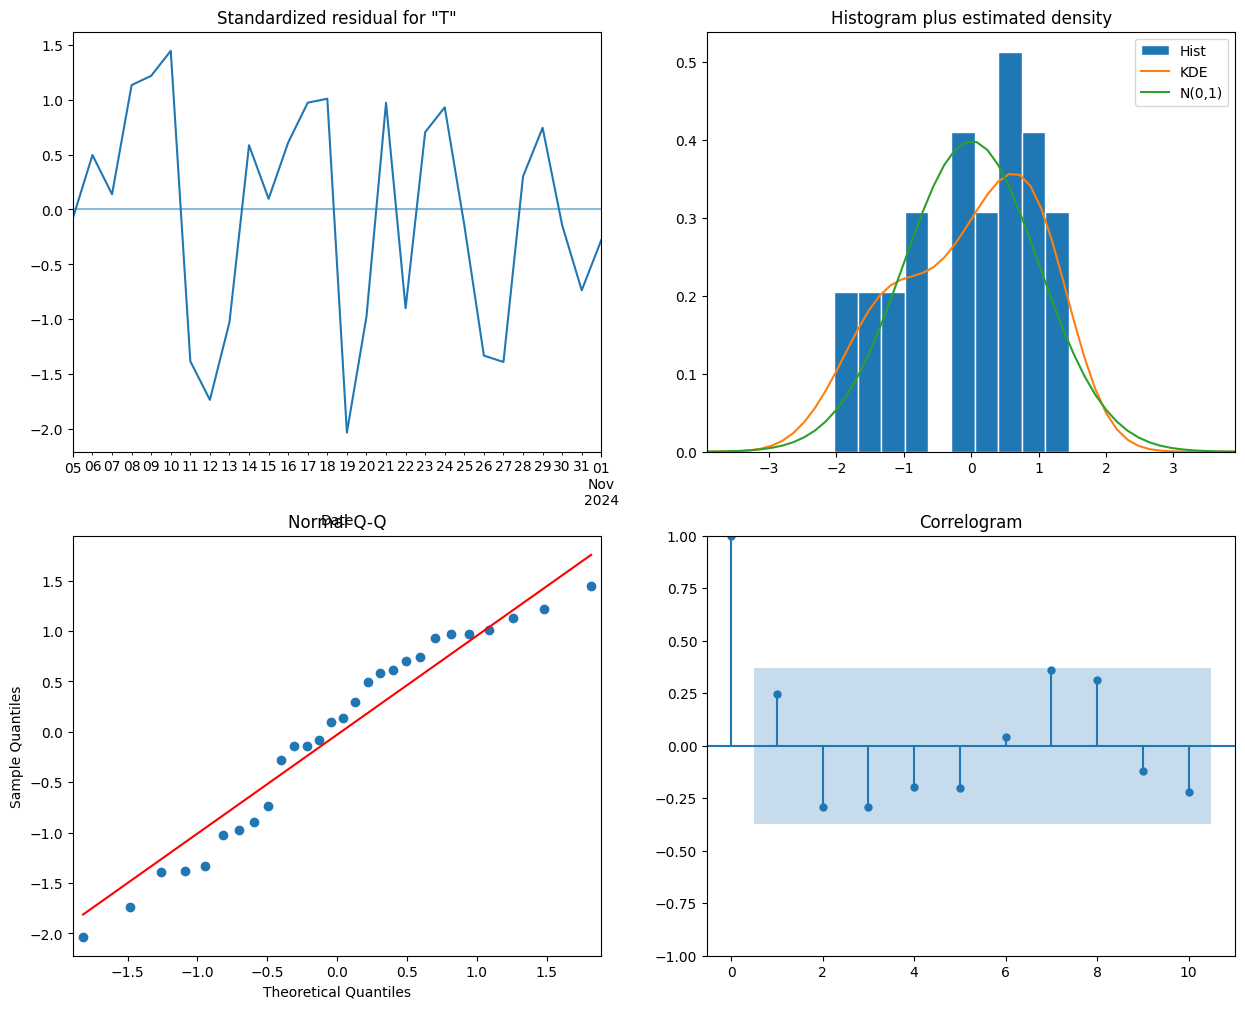

The Root Mean Squared Error of SARIMA with season_length=4 and dynamic = False 51.93


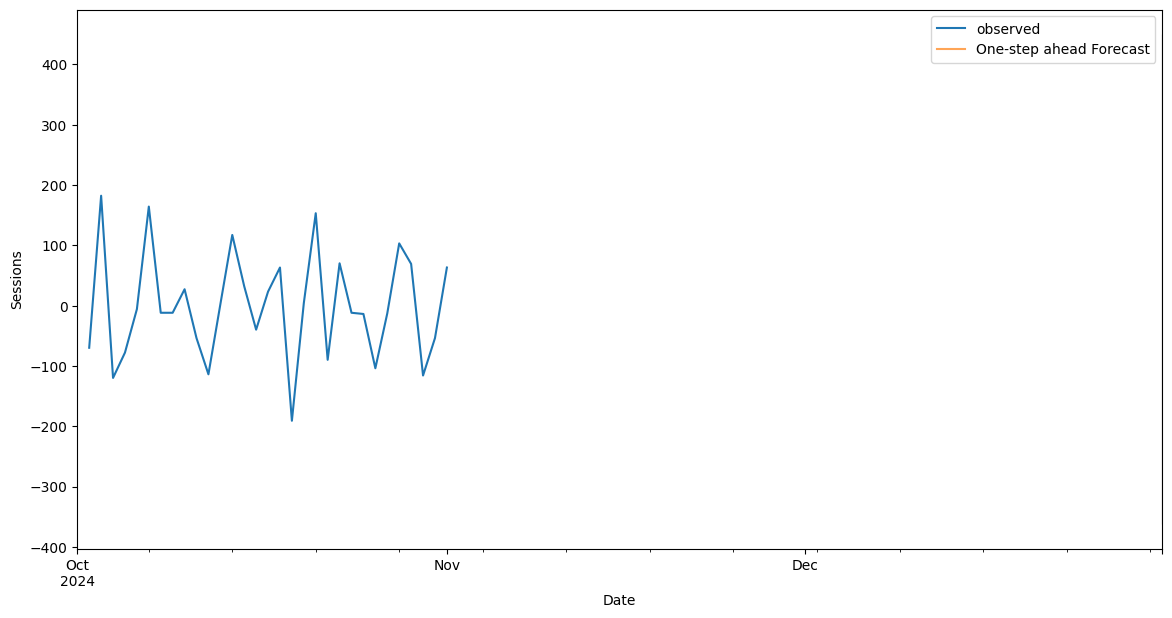

The Root Mean Squared Error of SARIMA with season_length=4 and dynamic = True 51.93


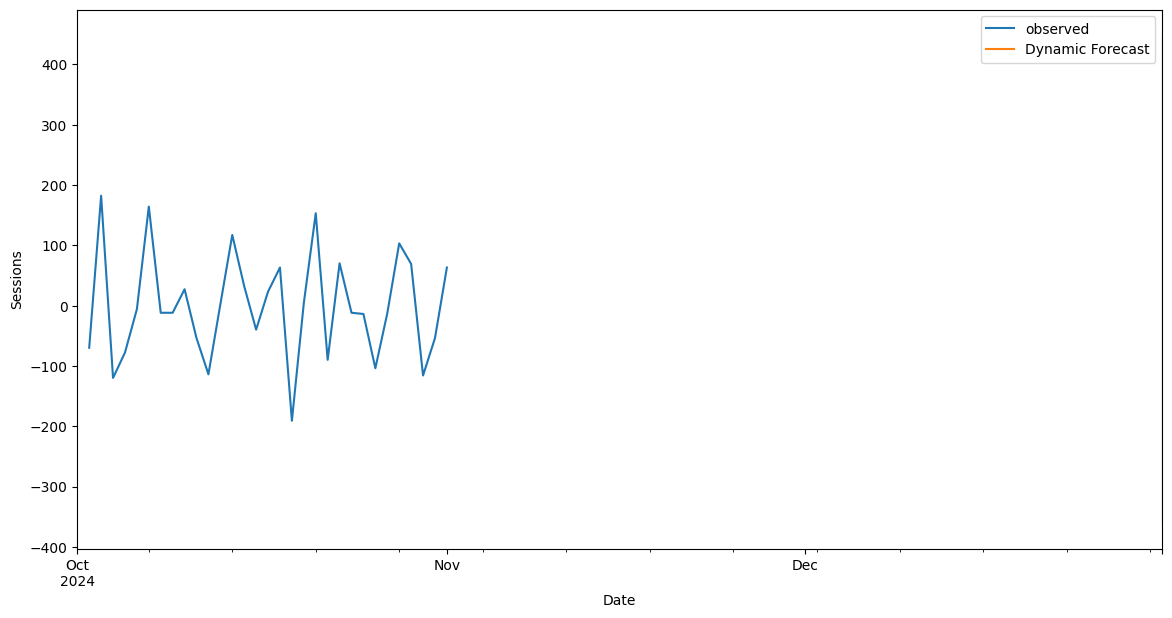

In [ ]:
# No need to run this!!!!
model = sarima_eva(y_to_train,(0, 0, 1),(0, 1, 1, 4),4,'2024-12-31',y_to_val)

In [ ]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

In [ ]:
model = sm.tsa.statespace.SARIMAX(y_to_train.dropna(),order=(1,0,1), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                   31
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -116.385
Date:                            Sat, 08 Mar 2025   AIC                            242.770
Time:                                    01:42:34   BIC                            247.492
Sample:                                10-02-2024   HQIC                           243.569
                                     - 11-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1382      0.345      0.400      0.689      -0.539       0.815
ma.L1         -0.9990     65.308   

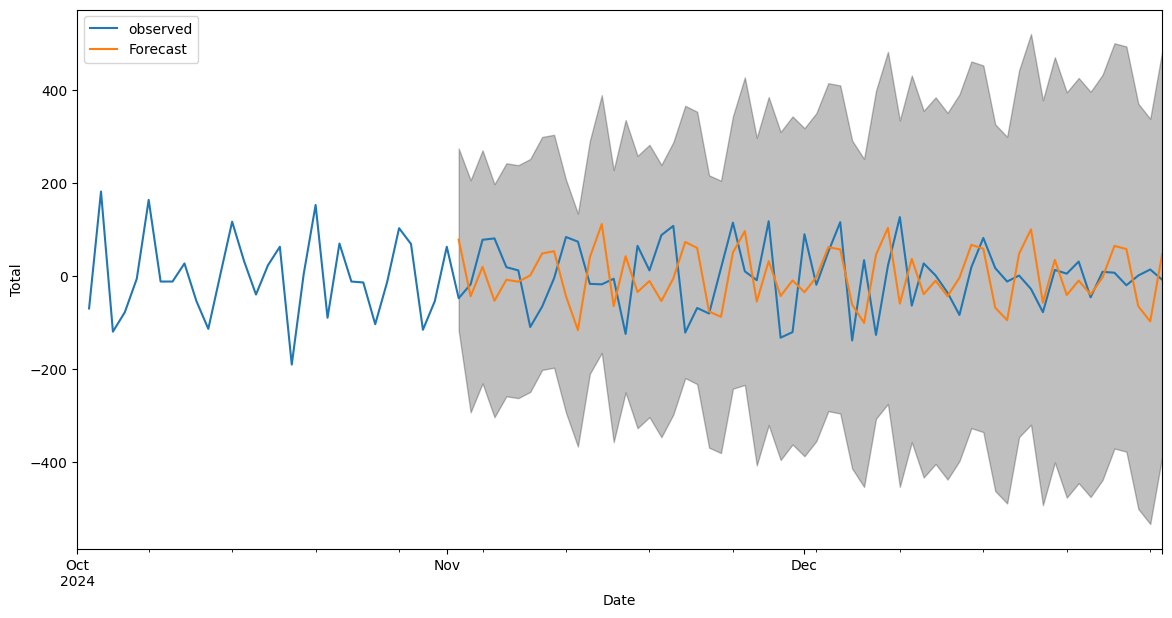

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2024-11-02,78.45278855,-117.95400141,274.85957850
1,2024-11-03,-43.78919224,-294.02033184,206.44194736
2,2024-11-04,19.70582534,-231.44082336,270.85247404
3,2024-11-05,-53.39229068,-304.55581275,197.77123140
4,2024-11-06,-8.19877655,-259.33510240,242.93754929
5,2024-11-07,-12.25001740,-263.34145835,238.84142355
6,2024-11-08,1.08968763,-250.00175265,252.18112791
7,2024-11-09,48.53950476,-202.55193551,299.63094502
8,2024-11-10,53.31695904,-197.77448122,304.40839931
9,2024-11-11,-43.69976092,-294.79120119,207.39167934


In [ ]:
final_table = forecast(ARIMAresult,60,tdf_4lag)
final_table.head(15)

In [ ]:
PredictionResults = ARIMAresult.predict(1, len(tdf_4lag)+2, typ ='levels').rename('Sarima Predictions')
PredictionResults

2024-10-03     0.58078282
2024-10-04    -1.42679521
2024-10-05     0.78786078
2024-10-06     0.76337075
2024-10-07     0.16166388
                 ...     
2024-12-31    46.96358325
2025-01-01   101.88114776
2025-01-02   -58.56370820
2025-01-03    35.72962658
2025-01-04   -40.20030378
Freq: D, Name: Sarima Predictions, Length: 94, dtype: float64

In [ ]:
from altair import to_csv
PredictionResults.to_csv("PredictionResults.csv")

In [ ]:
#df['forecast_data'] = ARIMAresult.predict(start = 150, end= 168, dynamic= True)
#df [['Total','forecast_data']]. plot (figsize= (12,8))
ARIMAtable = pd.Series(ARIMAresult.fittedvalues, copy=True)
ARIMAresult.fittedvalues

Date
2024-10-02      0.00000000
2024-10-03      0.58078282
2024-10-04     -1.42679521
2024-10-05      0.78786078
2024-10-06      0.76337075
2024-10-07      0.16166388
2024-10-08     -1.33870763
2024-10-09     -0.09646848
2024-10-10      0.08515412
2024-10-11     -0.21472430
2024-10-12      0.39612342
2024-10-13      0.85316457
2024-10-14    -68.79115105
2024-10-15     99.68689677
2024-10-16    -92.00767981
2024-10-17   -106.67222105
2024-10-18    -97.03980680
2024-10-19     37.44122374
2024-10-20    136.55160728
2024-10-21    106.99083095
2024-10-22      8.53745034
2024-10-23     19.43392388
2024-10-24   -137.78775168
2024-10-25    -68.00896613
2024-10-26     -8.04658975
2024-10-27    155.65267479
2024-10-28     61.61328131
2024-10-29    -30.60521663
2024-10-30    -42.93354768
2024-10-31     -1.65344806
2024-11-01     44.74043171
Freq: D, dtype: float64

Text(0.5, 1.0, 'RMSE: 37.9311')

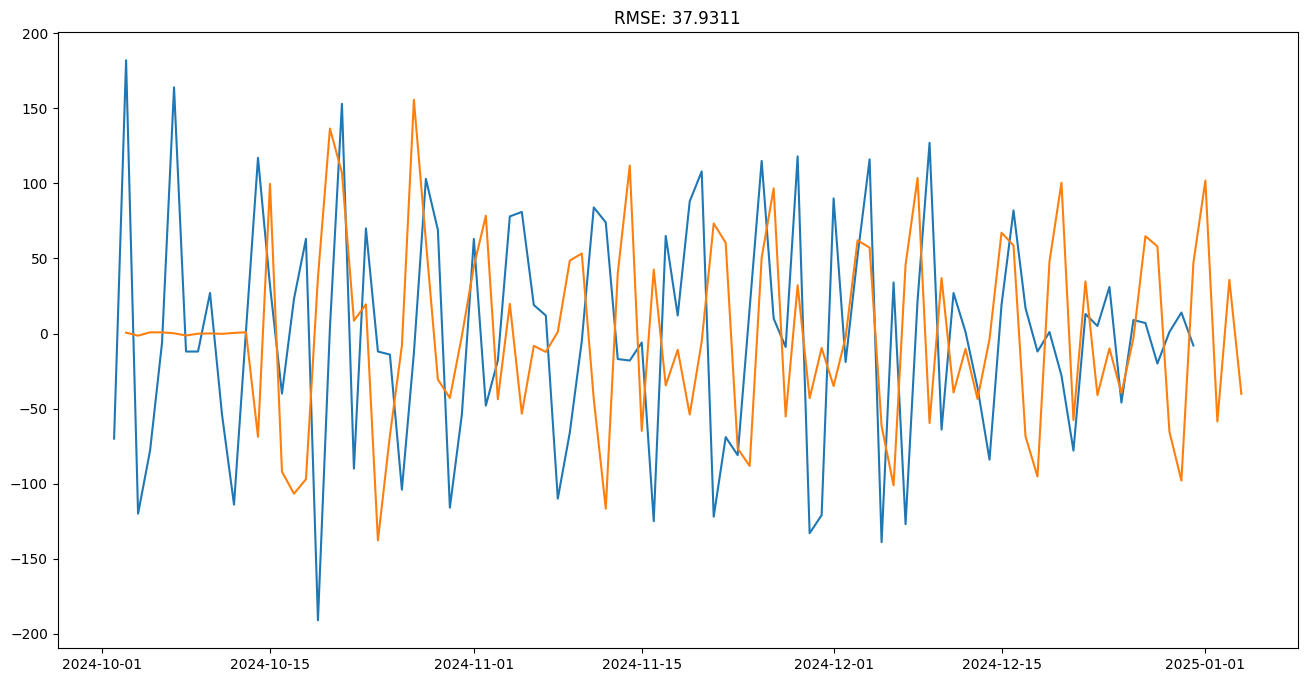

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tdf_4lag)
plt.plot(PredictionResults)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMAtable)**2)/len(tdf)))

In [ ]:
# Auto ARIMA
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p = 0,
                              start_q = 0,
                              start_d = 0,
                              max_d = 8,
                              max_p = 8,
                              max_q = 8,
                              test = 'adf',
                              start_P = 0,
                              start_Q = 0,
                              start_D = 0,
                              max_P = 8,
                              max_Q = 8,
                              max_D = 8,
                              stepwise= True,
                              seasonal = True,
                              trace = True,
                              m=12)
    return automodel

In [ ]:
arimamodel(tdf)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1043.285, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1026.534, Time=1.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1015.505, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1130.359, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1024.055, Time=0.47 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1015.600, Time=2.10 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1013.916, Time=2.21 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1015.321, Time=3.97 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=1014.754, Time=3.63 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=1016.635, Time=3.75 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1015.676, Time=4.13 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=1015.762, Time=2.90 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1016.214, Time=4.53 sec
 ARIMA(1,0,2)(0,0,2)[12]

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [ ]:
import pickle
pickle.dump(ARIMAresult, open('model.pkl','wb'))

In [51]:
print(pm.auto_arima(tdf.dropna(),seasonal=True, m=12, test = 'adf').summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   92
Model:             SARIMAX(0, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -501.958
Date:                                 Sat, 08 Mar 2025   AIC                           1013.916
Time:                                         01:43:46   BIC                           1026.525
Sample:                                     10-01-2024   HQIC                          1019.005
                                          - 12-31-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     90.7185      4.951     18.322      0.000      81.014     100

In [52]:
x = len(tdf)*(80/100)
x

73.60000000000001

In [53]:
y_to_train = tdf.iloc[:(int)(len(df)*(80/100))]
y_to_val = tdf.iloc[:(int)(len(df)*(20/100))]

In [54]:
model = sm.tsa.statespace.SARIMAX(tdf.dropna(),order=(3,3,0), seasonal_order=(0,0,0,12))

In [55]:
results = model.fit()

In [56]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   92
Model:               SARIMAX(3, 3, 0)   Log Likelihood                -551.897
Date:                Sat, 08 Mar 2025   AIC                           1111.795
Time:                        01:43:46   BIC                           1121.750
Sample:                    10-01-2024   HQIC                          1115.807
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1252      0.104    -10.789      0.000      -1.330      -0.921
ar.L2         -0.9177      0.130     -7.066      0.000      -1.172      -0.663
ar.L3         -0.3388      0.099     -3.417      0.0

In [57]:
start = len(y_to_train)

In [58]:
end = start + len(y_to_val) - 1

In [59]:
PredictionResults = results.predict(0, len(tdf)+1, typ ='levels').rename('Sarima Predications')

<Axes: xlabel='Date'>

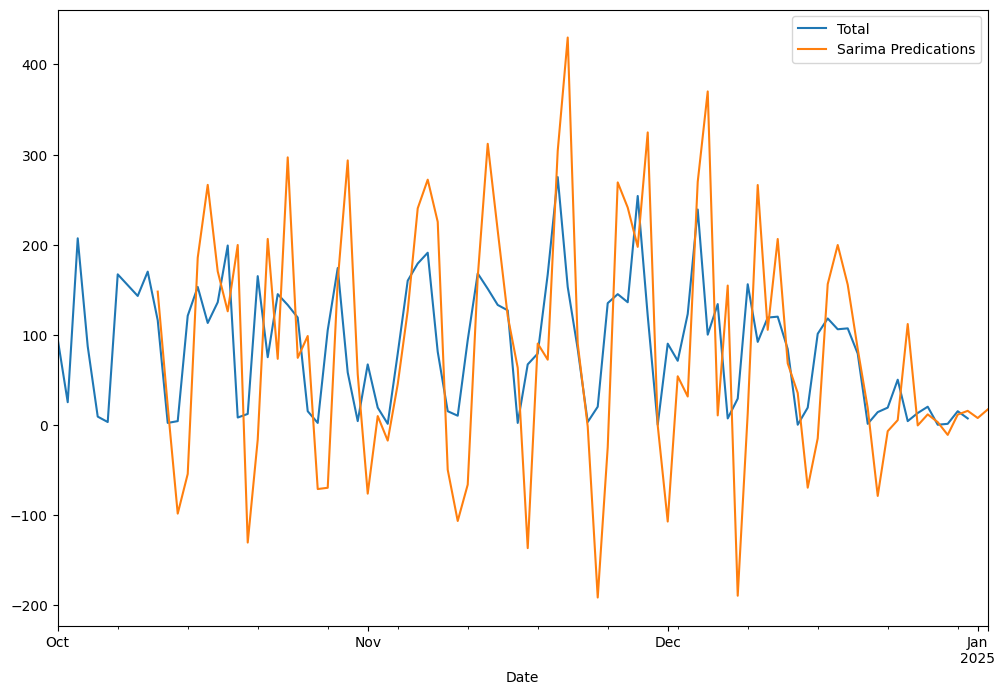

In [60]:
tdf.plot(legend=True,figsize=(12,8))
PredictionResults[10:].plot(legend=True)

In [61]:
from statsmodels.tools.eval_measures import rmse

In [62]:
error = rmse(y_to_val,PredictionResults)
error

ValueError: operands could not be broadcast together with shapes (18,) (94,) 